In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def format_data(model):
    data = pd.read_csv(str(n)+'_metrics_rapids_18_5_100_50.csv') 
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data = data.resample("1S", on="timestamp").sum()
    data['tvalue'] = data.index
    data['delta'] = (data['tvalue']-data['tvalue'][0])
    data['delta'] =data['delta'].apply(lambda x:int( x.value/ 10**9))
    data.set_index('delta', inplace=True)
    data = data[(data.T != 0).any()]
    data[str(n)+"_time_default_value"]=data["size_batch_training"]
    data[str(n)+"_nb_url_sent"]=data["nb_url_sent"]
    return data[[str(n)+"_nb_url_sent",str(n)+"_time_default_value"]]

In [3]:
data1 = pd.read_csv('metrics_rapids_1_1_100_50.csv') 
data2 = pd.read_csv('metrics_rapids_2_1_100_50.csv') 
data3 = pd.read_csv('metrics_rapids_3_1_100_50.csv') 
data4 = pd.read_csv('metrics_rapids_4_1_100_50.csv') 

data1 = format_df(data1,1)
data2 = format_df(data2,2)
data3 = format_df(data3,3)
data4 = format_df(data4,4)
df = pd.concat([data1, data2, data3, data4], axis=1)

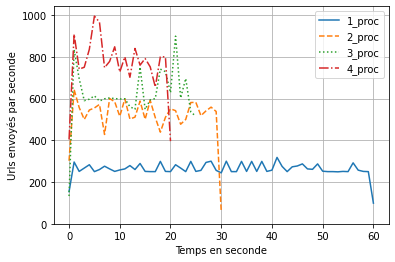

In [4]:
styles = ['-','--',':',"-."]

df.plot(style=styles)
plt.xlabel("Temps en seconde")
plt.ylabel("Urls envoyés par seconde")
plt.grid(True, which="major", ls="-")
plt.ylim(bottom=0)
# start avec y=0
plt.savefig('test_flux_diff_proc.svg') 